-----------------------------------

In [200]:
!wget https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1/Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_molecule_info.h5

--2024-10-04 21:27:34--  https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1/Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_molecule_info.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 687223423 (655M) [application/x-hdf5]
Saving to: 'Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_molecule_info.h5'

Visium_HD_Human_Lun 100%[===================>] 655.39M  13.0MB/s    in 44s     

2024-10-04 21:28:19 (14.7 MB/s) - 'Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_molecule_info.h5' saved [687223423/687223423]



In [203]:
import h5py
import numpy as np

def extract_unique_from_h5(file_path):
    unique_values_dict = {}

    def visit_datasets(name, obj):
        if isinstance(obj, h5py.Dataset):  
            try:
                data = obj[:]
                
                if np.issubdtype(data.dtype, np.bytes_):
                    data = data.astype(str)
                
                unique_values = np.unique(data)#getting only the unique elements in each dataset
                unique_values_dict[name] = unique_values
            except Exception as e:
                print(f"Could not process dataset {name}: {e}")

    with h5py.File(file_path, 'r') as f:
        f.visititems(visit_datasets)

    return unique_values_dict

# Example usage:
file_path = 'Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_molecule_info.h5'  # Replace with your file path
unique_items = extract_unique_from_h5(file_path)




Could not process dataset metrics_json: Illegal slicing argument for scalar dataspace


In [204]:
keys=list(unique_items.keys())

In [205]:
unique_items.keys()

dict_keys(['barcode_idx', 'barcode_info/genomes', 'barcode_info/pass_filter', 'barcodes', 'count', 'feature_idx', 'features/_all_tag_keys', 'features/feature_type', 'features/genome', 'features/id', 'features/name', 'features/target_sets/Visium Human Transcriptome Probe Set v2.0', 'gem_group', 'library_idx', 'library_info', 'probe_idx', 'probes/feature_id', 'probes/feature_name', 'probes/filtered_probes', 'probes/included_probes', 'probes/probe_id', 'probes/region', 'umi', 'umi_type'])

In [236]:
n=21

print(keys[n])
unique_items[keys[n]]

probes/region


array(['spliced', 'unspliced'], dtype='<U64')

-----------------------

In [165]:
!wget https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1/Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_binned_outputs.tar.gz

--2024-10-04 20:29:36--  https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1/Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_binned_outputs.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6190241597 (5.8G) [application/x-tar]
Saving to: 'Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_binned_outputs.tar.gz'

Visium_HD_Human_Lun 100%[===================>]   5.76G   134MB/s    in 49s     

2024-10-04 20:30:26 (119 MB/s) - 'Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_binned_outputs.tar.gz' saved [6190241597/6190241597]



In [167]:
!tar -xzvf /kaggle/working/Visium_HD_Human_Lung_Cancer_HD_Only_Experiment1_binned_outputs.tar.gz


binned_outputs/
binned_outputs/square_002um/
binned_outputs/square_002um/filtered_feature_bc_matrix/
binned_outputs/square_002um/filtered_feature_bc_matrix/matrix.mtx.gz
binned_outputs/square_002um/filtered_feature_bc_matrix/features.tsv.gz
binned_outputs/square_002um/filtered_feature_bc_matrix/barcodes.tsv.gz
binned_outputs/square_002um/filtered_feature_bc_matrix.h5
binned_outputs/square_002um/raw_feature_bc_matrix/
binned_outputs/square_002um/raw_feature_bc_matrix/matrix.mtx.gz
binned_outputs/square_002um/raw_feature_bc_matrix/features.tsv.gz
binned_outputs/square_002um/raw_feature_bc_matrix/barcodes.tsv.gz
binned_outputs/square_002um/raw_feature_bc_matrix.h5
binned_outputs/square_002um/raw_probe_bc_matrix.h5
binned_outputs/square_002um/spatial/
binned_outputs/square_002um/spatial/aligned_fiducials.jpg
binned_outputs/square_002um/spatial/aligned_tissue_image.jpg
binned_outputs/square_002um/spatial/cytassist_image.tiff
binned_outputs/square_002um/spatial/detected_tissue_image.jpg
binn

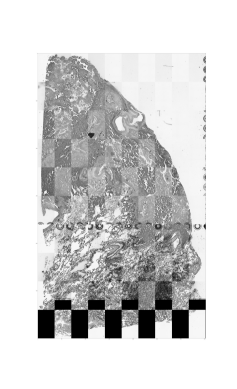

In [169]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('binned_outputs/square_016um/spatial/aligned_tissue_image.jpg')  # Replace with your image path

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
